# Stochastic Growth and Long-Run Risk

## Overview

__This notebook displays three models and solutions with capital and endogenously determined long-run risk.  The models are considered in each of the three sections of this notebook and include:__

__1. Adjustment cost__

__2. Permanent income__

__3. Habit persistance__

__The first is an AK model with adjustment costs inspired in part by Eberly and Wong but includes a persistence process for technology.  The second is a version of Friedman's permanent income model, and the third one extends this to include habit persistence preferences motivated by the work of Hansen, Sargent Tallarini.__

## Section 1: Adjustment Cost

We consider a so-called $AK$ model with adjustment costs and state dependent growth. 

### Section 1.1: Model Specification

 - Discrete-time utility recursion:
\begin{align*}
V_t & = \left( \left[1 - \exp(-\delta)\right] (C_t)^{1-\rho} + \exp(-\delta) \left[ {\mathcal R}\left( V_{t+1} \mid {\frak F}_t \right) \right]^{1-\rho} \right)^{\frac 1 {1-\rho}} \cr
 {\mathcal R}\left( V_{t+1} \mid {\frak F}_t \right) & = \left(E\left[ \left( V_{t+1} \right)^{1 - \gamma} \mid {\frak F}_t \right] \right)^{\frac 1 {1-\gamma}}
\end{align*}


where ${\frac 1 \rho}$ is the intertemporal elasticity of substitution, $\gamma$ is a risk aversion parameter and $\delta$ is the subjective rate of discount.  Moreover, $C_t$ is consumption, $V_t$ is the continuation value, and ${\mathfrak F}_t$ is the current period consumer/investor information.  



 - Marginal utility processes:  
\begin{align*}
MC_t & = [(1 - \exp(-\delta) ] (C_t)^{-\rho} (V_t)^\rho  \cr
MR_t & = \exp(-\delta) (R_t)^{-\rho} (V_t)^{\rho}  
\end{align*}
where $R_t \equiv {\mathcal R}\left( V_{t+1} \mid {\frak F}_t \right)$.  





 - Discrete-time state evolution:
\begin{align*}
K_{t+1}  &= K_t\left[1 + \phi \left({\frac {I_t} {K_t}}\right) \right]^{\frac{1}{\phi}} G_{t+1} \cr
G_{t+1} & \equiv \exp \left( - \alpha_k + Z_{t+1} - {\frac 1 2} \mid \sigma_k \mid^2  + \sigma_k\cdot W_{t+1} \right) \cr
C_t + I_t & = {\mathbb A} K_t \cr
 Z_{t+1} &= \exp(-\beta_z) Z_t + \sigma_z \cdot W_{t+1}
 \end{align*}
 
 
where $W_{t+1}$ is distributed as a bivariate standard normal. Consolidating the first-order conditions for investment and consumption gives:

\begin{equation*}
\left[1 + \phi \left(\frac{I_t}{K_t}\right) \right]^{\frac{1}{\phi} - 1}  = [\exp(\delta) - 1 ] \left[1 + \phi \left({\frac {I_t} {K_t}}\right) \right]^{\frac{1}{\phi}} \left({\frac {C_t}{K_t}}\right)^{-\rho} \left({\frac {R_t}{K_t}}\right)^{\rho  - 1} 
\end{equation*}


which can be solved for either ${\frac {C_t} {K_t}}$ or ${\frac {I_t}{K_t}}$ after substituting from the equation 
${\mathbb A} = {\frac {C_t}{K_t}} + {\frac {I_t}{K_t}}$.  

We solve the model using first-order small noise approximation.  We check the solution against a more general nonlinear method and verify the quality of the approximation.  

### Section 1.2: First Calibration, Low Steady State Rate of Return

Our calculations use the following parameter values:
\begin{align*}  
& \begin{matrix}
{\alpha}_c  & = & .484  & & & & \cr
{ \alpha}_z  &= & 0 &  & { \beta_z} & = & .014 \end{matrix} \cr \cr
& \sigma =\begin{bmatrix}
(\sigma_k)' \cr (\sigma_z)' \end{bmatrix}  =    \begin{bmatrix} .477  & 0 \cr  .011 & .025 \end{bmatrix}
\end{align*}


The quantities computed with these numbers will be in percentage terms (100 times log differences).  

Use the order zero relations to pin down some key parameters:
\begin{align*} 
{\frac C I} & = {\frac {\exp\left( c^0 \right)}{ {\mathbb A} - \exp\left( c^0 \right)}} = 2.556
\label{calibration1}  \\
{\frac I K} & = {\mathbb A} - \exp\left( c^0 \right) = .074 \   \\
 \delta + .00484 \rho & = .007 \\
\exp( k^0) & = \exp(.01 \alpha_c)  = \exp(.00484) \\
\exp( k^0) & = \left[ 1 + \phi \left( {\mathbb A} - \exp \left( c^0 \right) \right) \right]^{\frac{1}{\phi}} \exp(  - .01 \alpha_k ) \\
\exp( v^0 (1 - \rho)) & = (1 - \exp(-\delta))\exp(c^0(1 - \rho)) - \exp(-\delta + (v^0 + k^0)(1 - \rho)) \\
\left[ 1 + \phi \left( {\mathbb A} - \exp \left( c^0 \right) \right) \right]^{\frac{1}{\phi} - 1} & = \exp(-\rho c^0 + (\rho - 1)(v^0 + k^0))(\exp(\delta)-1)\left[ 1 + \phi \left( {\mathbb A} - \exp \left( c^0 \right) \right) \right]^{\frac{1}{\phi}}
\end{align*}


Multiplying the first two equations determine $c^0$, and given $c^0$, ${\mathbb A}$ can be inferred from the second equation. The third equation determines $\delta$. The fourth equation  determines $k^0$. The final three equations are solved for $\phi$, $\alpha_k$, and $v^0$. All of these are solved for a pre-specified value of $\rho$. The implied value of ${\mathbb A} = .263$, the implied value of $\phi = 13.3$, and the implied value of $\alpha_k = 3.20$. The implied annualized return is 2.8 percent. We consider $\rho = .5, 1, 2$.

### Data Sources

| Data Series | Source | Frequency | Time Period | Calculated Average |
| --- | --- | --- | --- | --- |
| Nondurable Goods and Services to Fixed Asset Investment Ratio | BEA NIPA 1.1.5 and BEA Fixed Assets 1.5 | Annual | 1948 - 2017 | 2.556 |
| Fixed Asset Investment to Fixed Assets Ratio | BEA Fixed Assets 1.1 and 1.5 | Annual | 1948 - 2017 | 0.074 |


In [1]:
# Import necessary packages
import numpy as np
import matplotlib.pyplot as plt
from model_code import solve_model
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
def plot_impulse(rhos, gamma, betaz, T, shock = 1, rf_factor = 1, empirical_method = 1, 
                 transform_shocks = False, title = None):
    """
    Given a set of parameters, computes and displays the impulse responses of
    consumption, capital, the consumption-investment ratio, along with the
    shock price elacticities.
    
    Input
    ==========
    Note that the values of delta, phi, A, and a_k are only used for the
    empirical_method = 0 specification (see below). 
    
    rhos:               The set of rho values for which to plot the IRFs.
    gamma:              The risk aversion of the model.
    betaz:               Shock persistence.
    T:                  Number of periods to plot (in quarters).
    shock:              (1 or 2) Defines which of the two possible shocks to plot.
    rf_factor:          This number is used as follows: delta + 0.00373 * rho = 
                        rf_factor * 0.0075
    transform_shocks:   True or False. True to make the rho = 1 response to 
                        shock 2 be transitory.
    title:              Title for the image plotted.
    """
    
    fig = plt.figure(figsize=(20, 30))
    
    smin = 0
    smax = 0
    kmin = 0
    kmax = 0
    cmin = 0
    cmax = 0
    dmin = 0
    dmax = 0
    
    for i, r in enumerate(rhos):

        S, K, C, I = solve_model(r, gamma, betaz, T, risk_free_adj = rf_factor, 
                                 empirical = empirical_method, 
                                 transform = transform_shocks, shock = shock, verbose = False)[2]

        plt.subplot(4, 1, 1)
        plt.tick_params(labelsize = 15)
        plt.plot(S, label=r"$\rho={}$".format(r), lw=3)
        smin = min(smin, np.min(S) * 1.2)
        smax = max(smax, np.max(S) * 1.2)
        if i == len(rhos) - 1:
            plt.ylabel("Price Elasticity", fontsize = 25)
            plt.legend(loc='lower right', prop={'size': 20})
            plt.ylim([smin, smax])

        plt.subplot(4, 1, 2)
        plt.tick_params(labelsize = 15)
        plt.plot(100*K, label=r"$\rho={}$".format(r), lw=3)
        kmin = min(kmin, np.min(K) * 120)
        kmax = max(kmax, np.max(K) * 120)
        if i == len(rhos) - 1:
            plt.ylabel("Capital", fontsize = 25)
            plt.legend(loc='lower right', prop={'size': 20})
            plt.ylim([kmin, kmax])

        plt.subplot(4, 1, 3)
        plt.tick_params(labelsize = 15)
        plt.plot(100 * C, label=r"$\rho={}$".format(r), lw=3)
        cmin = min(cmin, np.min(C) * 120)
        cmax = max(cmax, np.max(C) * 120)
        if i == len(rhos) - 1:
            plt.ylabel("Consumption", fontsize = 25)
            plt.legend(loc='lower right', prop={'size': 20})
            plt.ylim([cmin, cmax])

        plt.subplot(4, 1, 4)
        plt.tick_params(labelsize = 15)
        plt.plot(100 * (C - I), label=r"$\rho={}$".format(r), lw=3)
        dmin = min(dmin, np.min(C - I) * 120)
        dmax = max(dmax, np.max(C - I) * 120)
        if i == len(rhos) - 1:
            plt.ylabel("Consumption-Investment Ratio", fontsize = 25)
            plt.legend(loc='lower right', prop={'size': 20})
            plt.ylim([dmin, dmax])
            plt.xlabel("Time (quarters)", fontsize = 25)

    plt.suptitle(title, fontsize = 30)
    plt.tight_layout(rect=[0, 0, 1, 0.97]) # Allow for padding on the suptitle

    plt.show()

In [3]:
# Define some reasonable parameter sets.
ρs = [.5, 1, 2]
γ = 10
βz = 0.017
T = 200

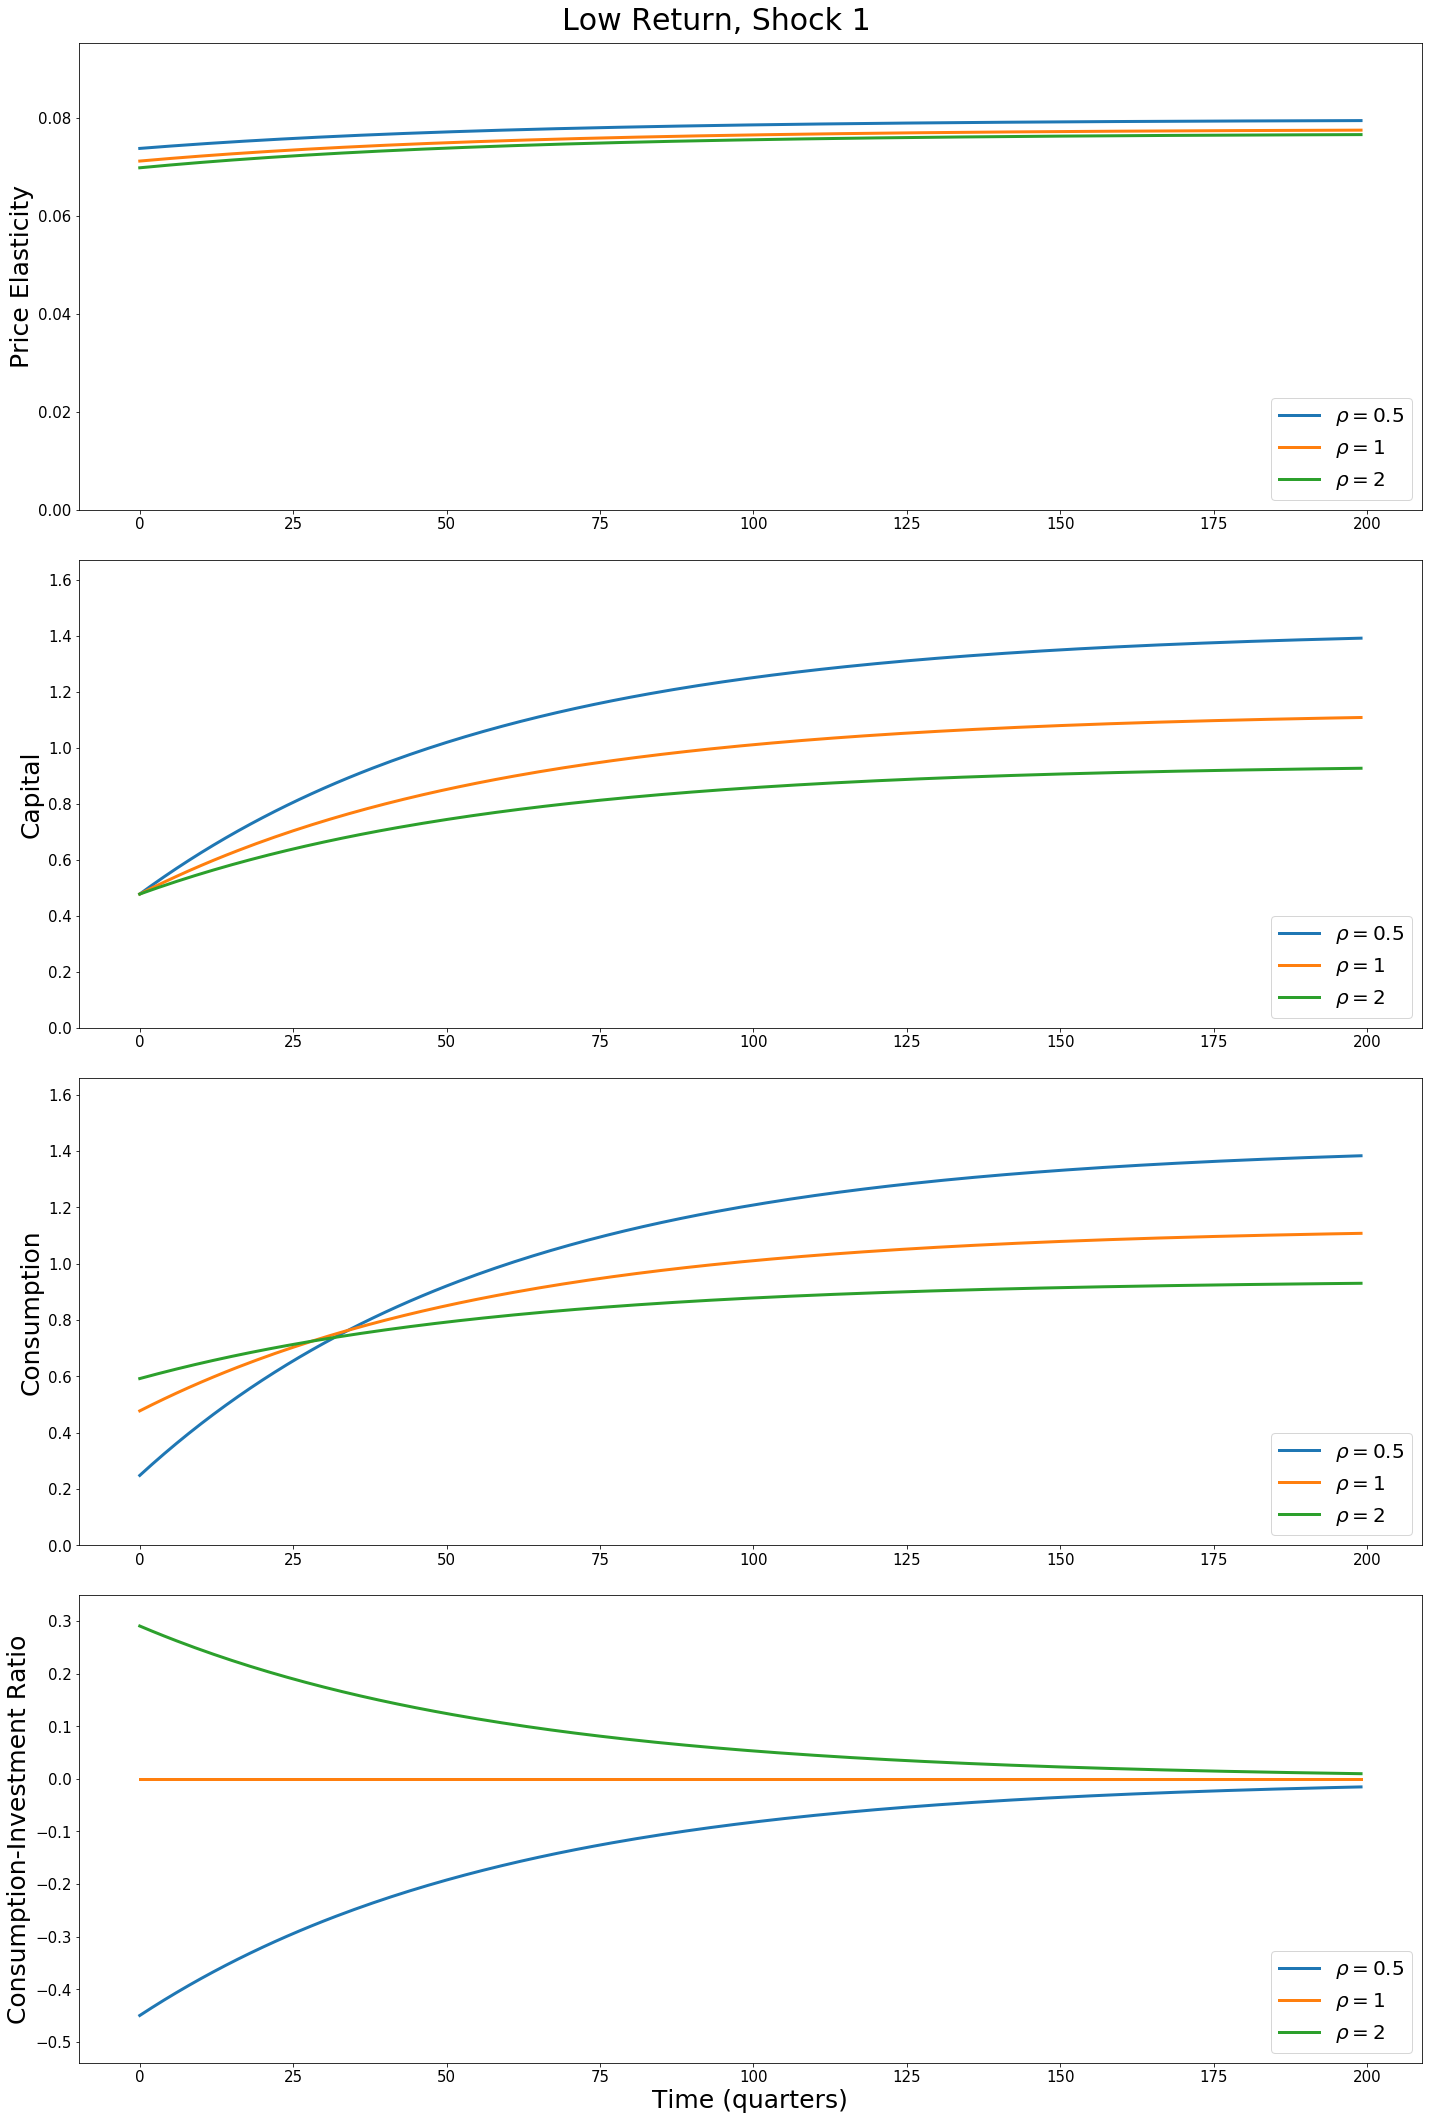

In [4]:
plot_impulse(ρs, γ, βz, T, shock = 1, rf_factor = 1, empirical_method = 0, 
             transform_shocks = False, title = "Low Return, Shock 1")

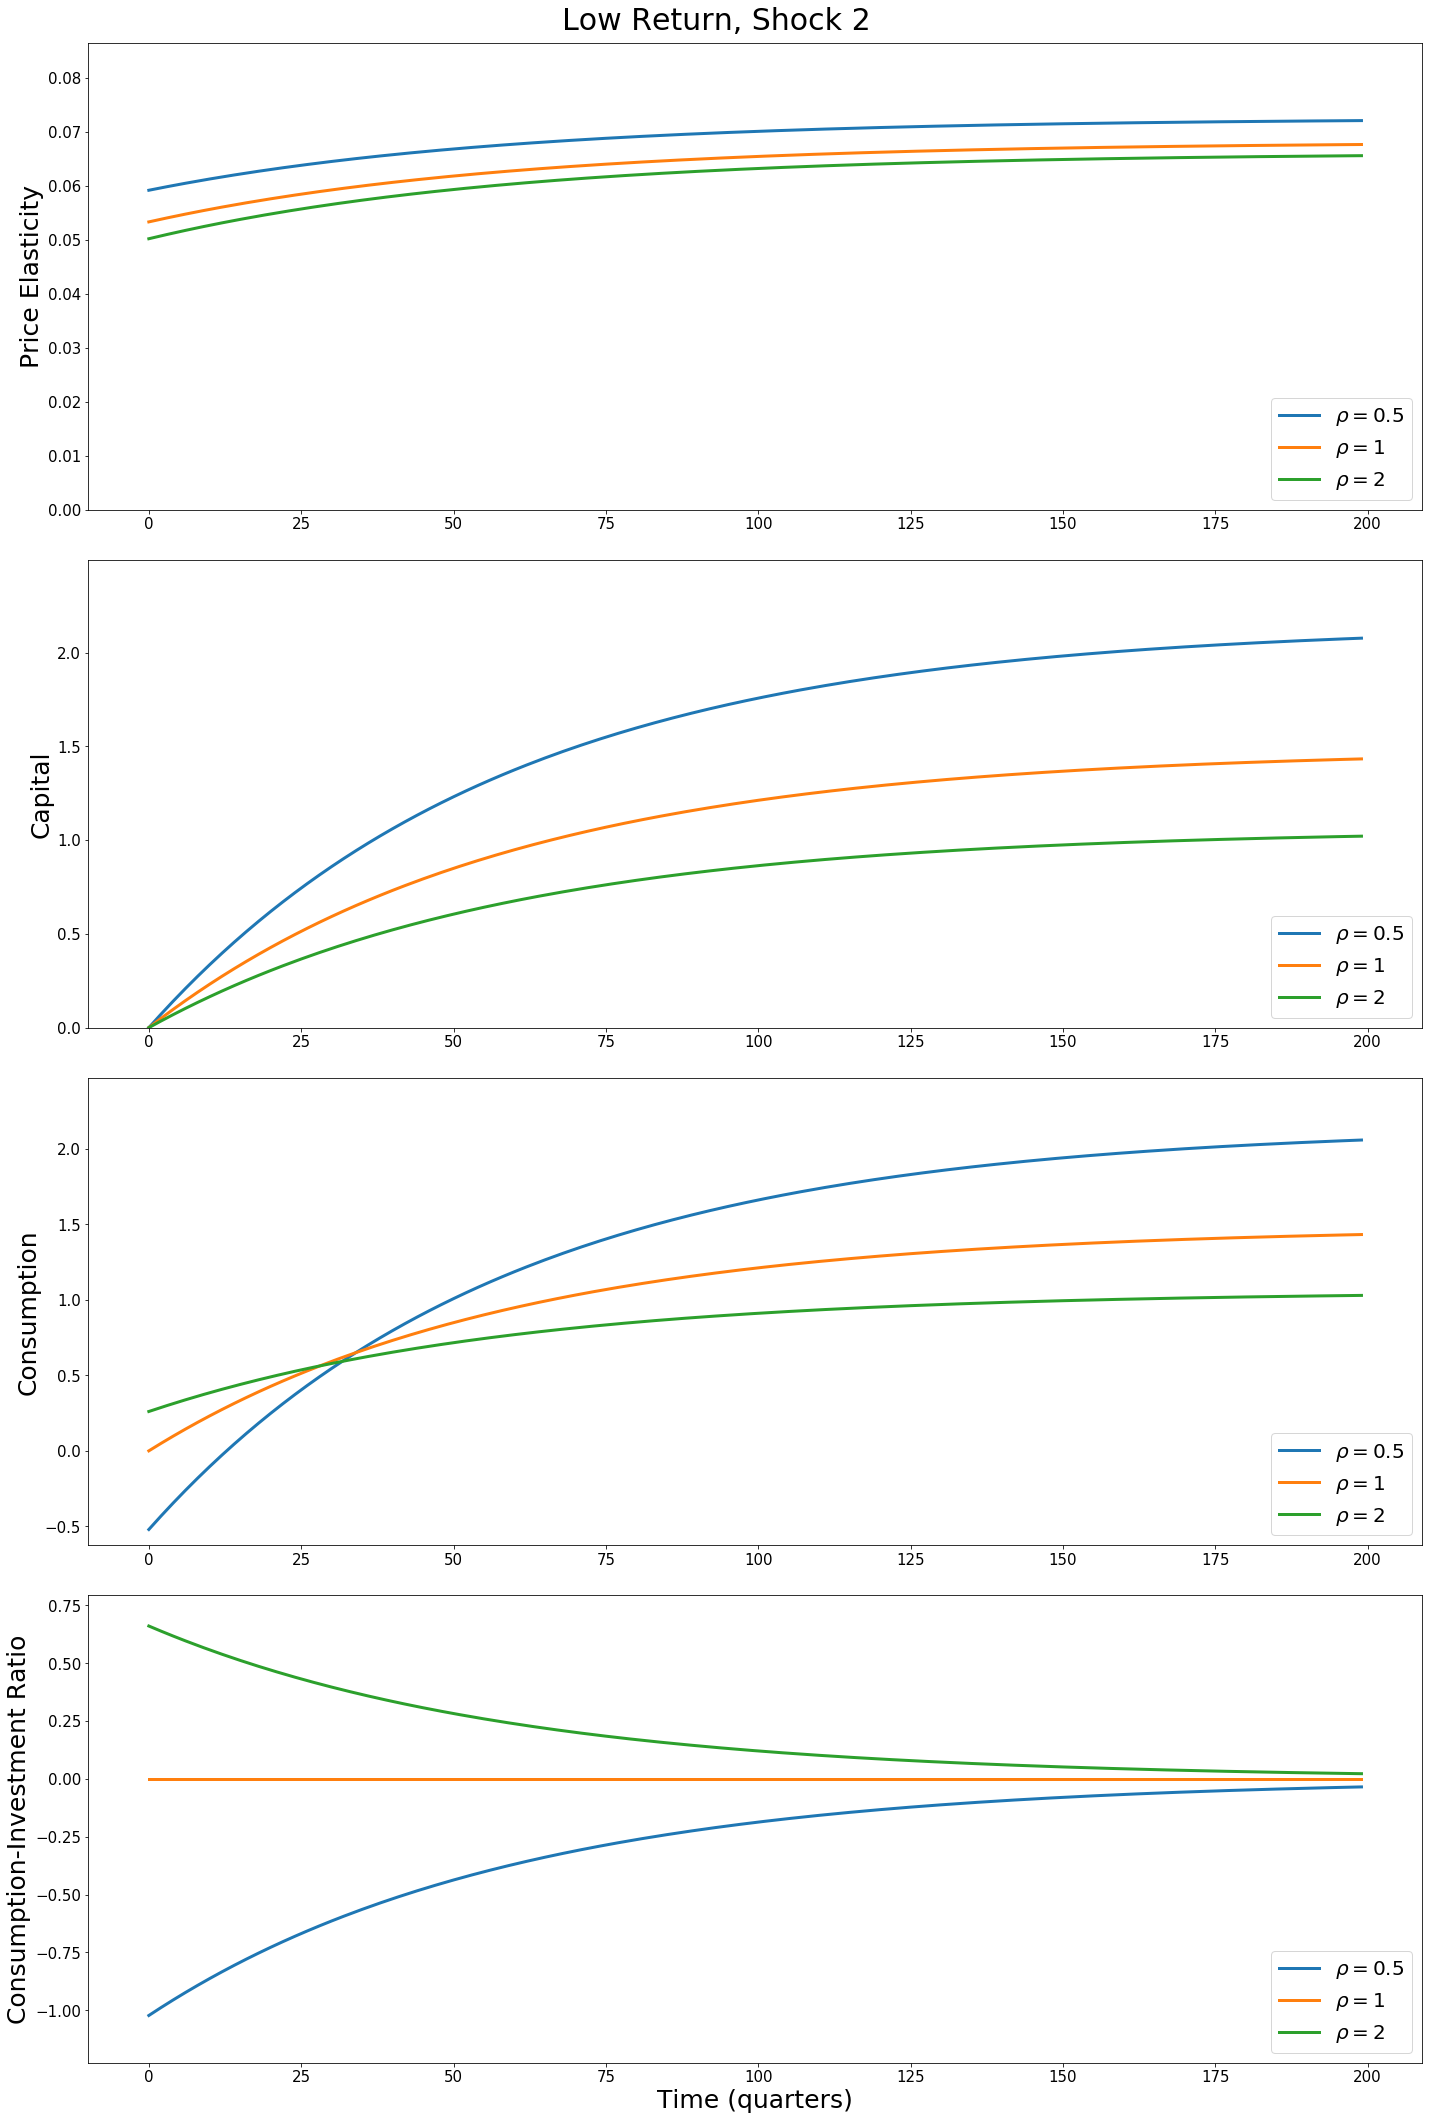

In [5]:
plot_impulse(ρs, γ, βz, T, shock = 2, rf_factor = 1, empirical_method = 0, 
             transform_shocks = False, title = "Low Return, Shock 2")

### Section 1.3: Second Calibration, High Return

We now consider a specification with a higher return whereby
\begin{equation*}
\delta + .00484 \rho  = .014
\end{equation*}
implying a 5.6 percent annualized return.  For this calibration ${\mathbb A} = .263$, $\alpha_k = 3.35$ and $\phi=12.8$.

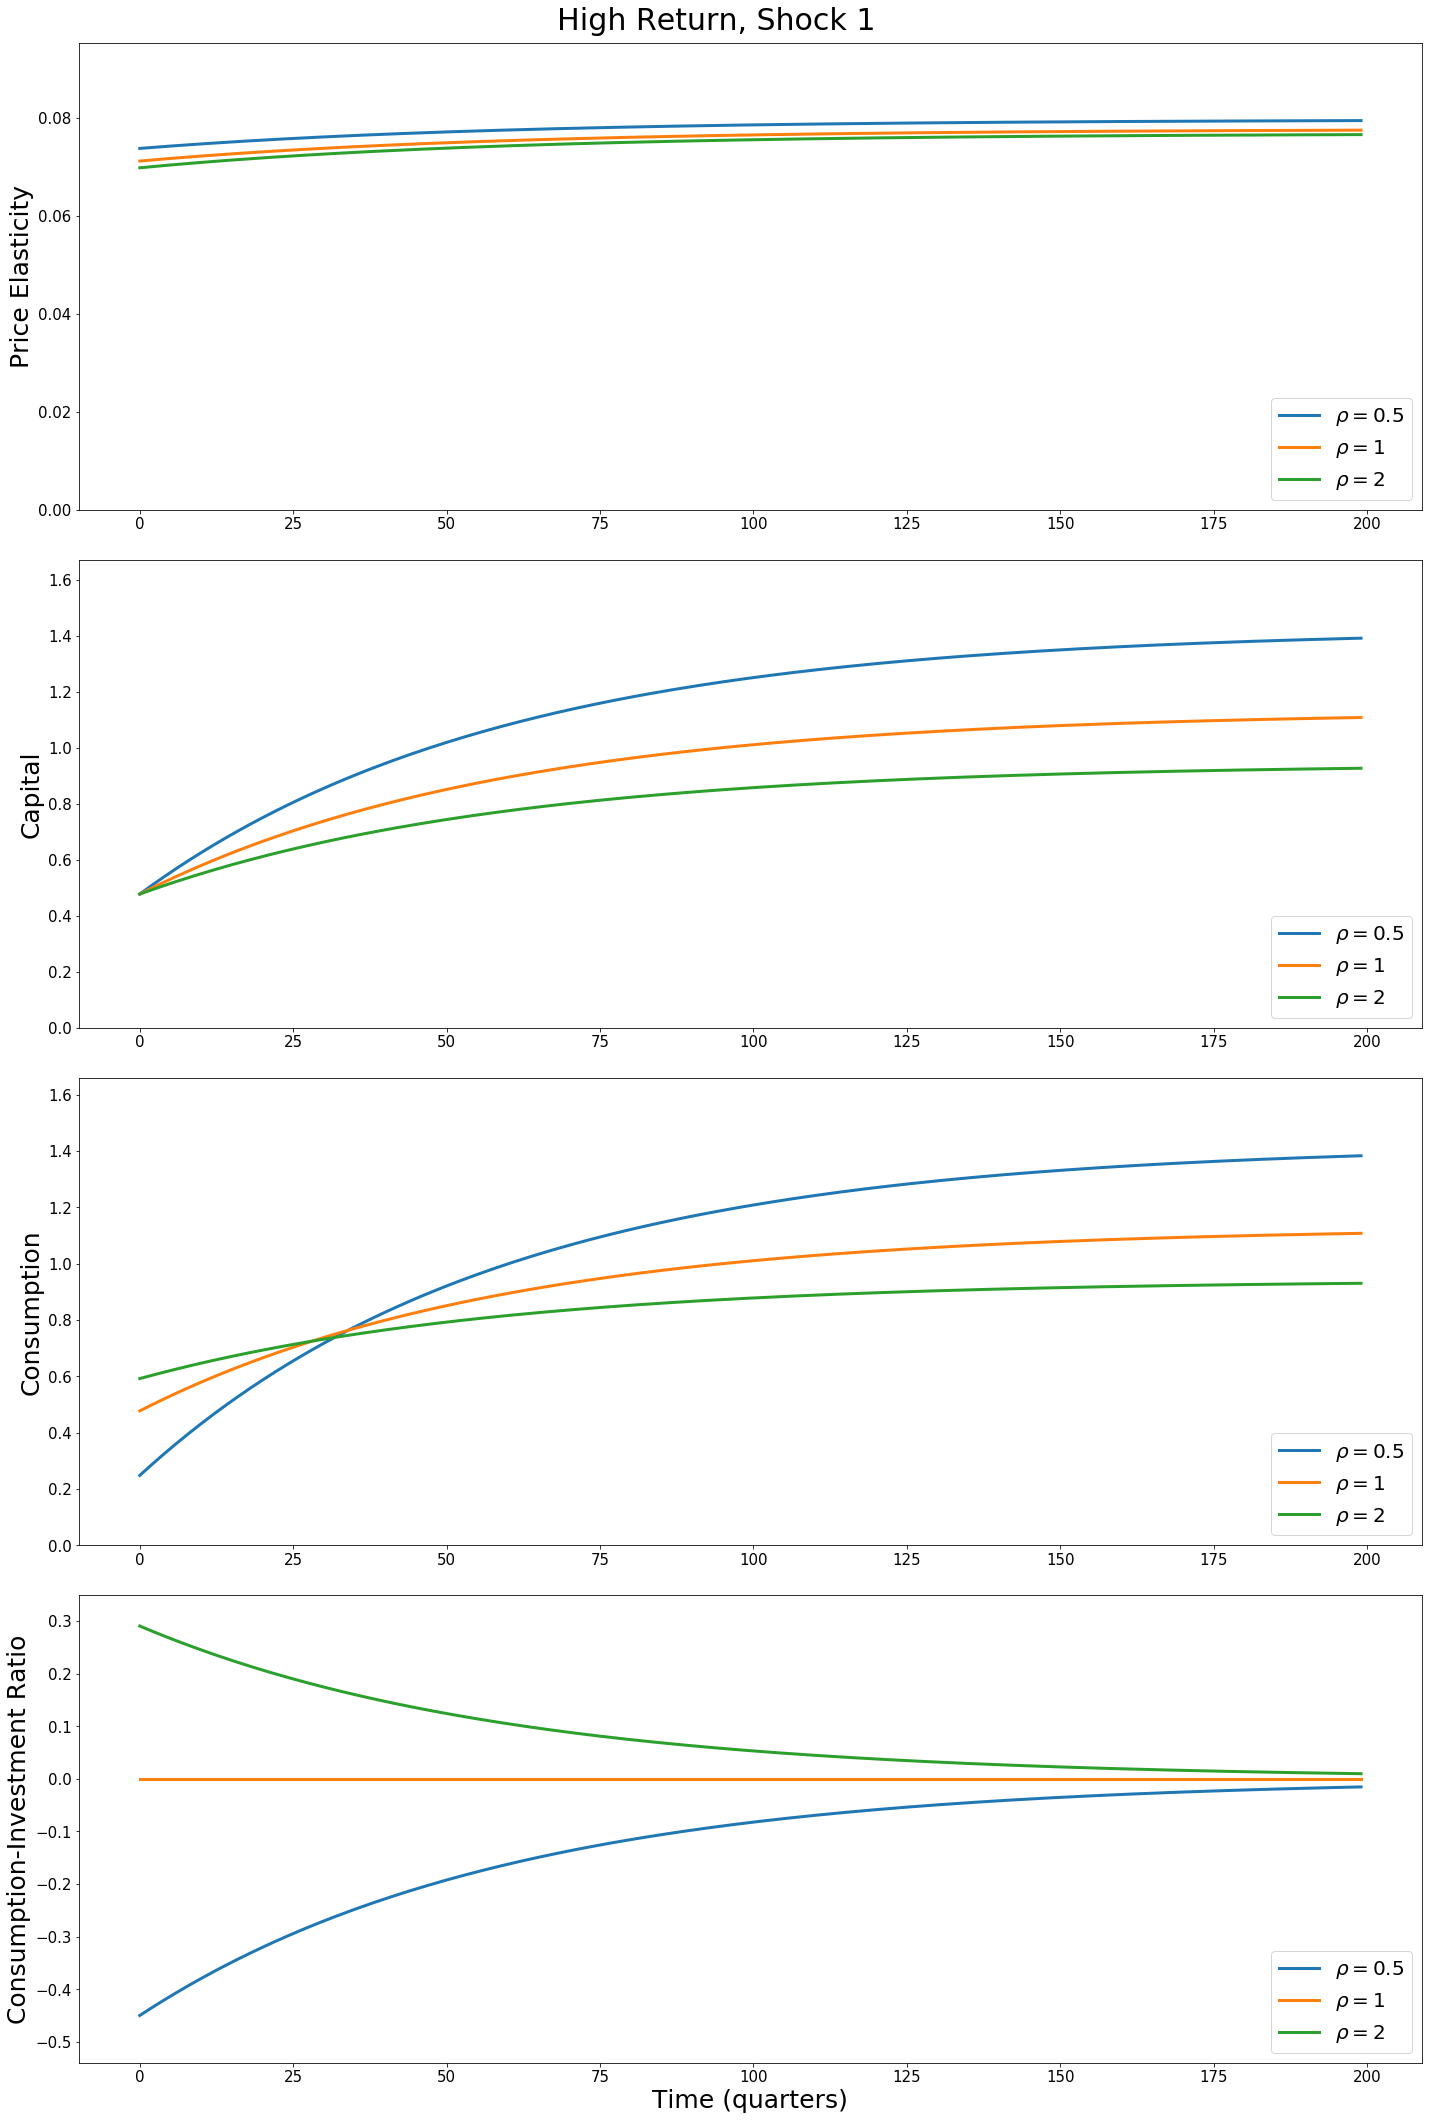

In [6]:
plot_impulse(ρs, γ, βz, T, shock = 1, rf_factor = 2, empirical_method = 0, 
             transform_shocks = False, title = "High Return, Shock 1")

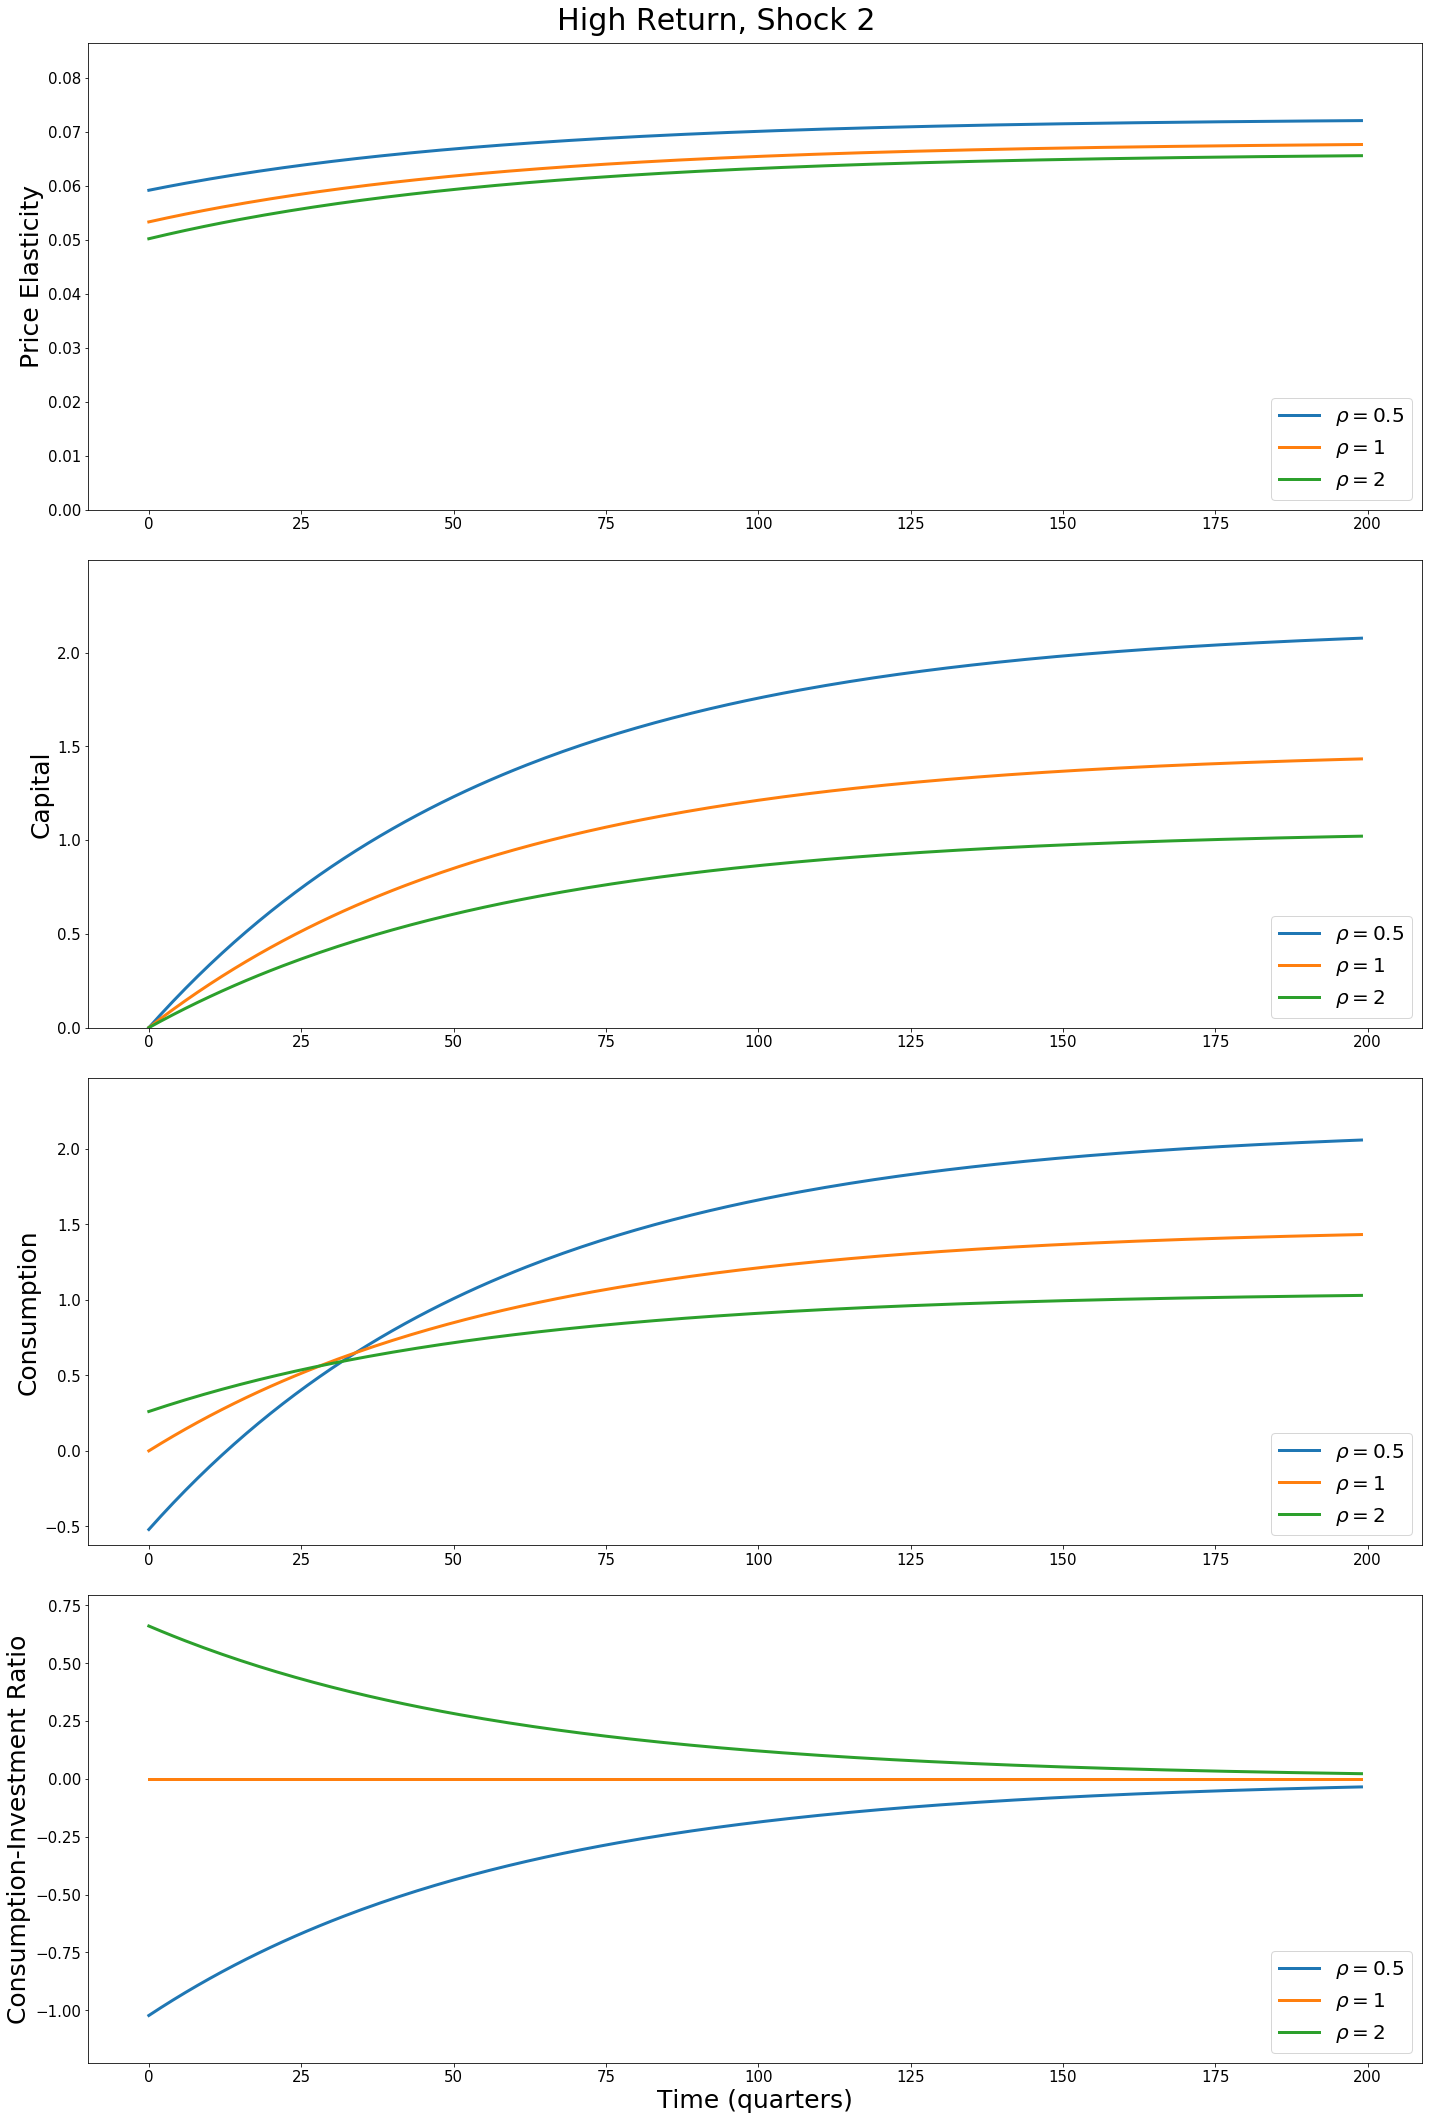

In [7]:
plot_impulse(ρs, γ, βz, T, shock = 2, rf_factor = 2, empirical_method = 0, 
             transform_shocks = False, title = "High Return, Shock 2")

### Section 1.4: Third Calibration, Zero Adjustment Cost

For comparison, we consider a corresponding model without adjustment costs.  Thus we set $\phi = 0$, and we no longer restrict the consumption/investment ratio.  The implied value of ${\mathbb A} = .085$, the implied value of $\alpha_k = 6.65$ and order zero consumption investment ratio is $.15$.  For the return restriction, we impose: 
\begin{equation*}
\delta + .00484 \rho  = .014
\end{equation*}
implying a 5.6 percent annualized return.

In [8]:
# plot_impulse(ρs, γ, βz, T, empirical_method = 2, shock = 1, rf_factor = 2, 
#              transform_shocks = False, title = "Zero Adjustment Cost, Shock 1")

In [9]:
# plot_impulse(ρs, γ, βz, T, empirical_method = 2, shock = 2, rf_factor = 2, 
#              transform_shocks = False, title = "Zero Adjustment Cost, Shock 2")

### Section 1.5: Permanent and Transitory Shocks

In the previous calculations, both shocks have permanent consequences.  We now repeat these same exercises with an observationally equivalent shock configuration for which the first shock is permanent and the second one is transitory under the $\rho = 1$ specification.  Recall that for $\rho=1$ the consumption-captial and investment capital ratios are constant.  To implement this, we alter $\sigma$ as following:


\begin{equation*}  
\sigma =\begin{bmatrix}
(\sigma_k)' \cr (\sigma_z)' \end{bmatrix}  =    \begin{bmatrix} .289  & .379 \cr  .027 & - .0064 \end{bmatrix}
\end{equation*}



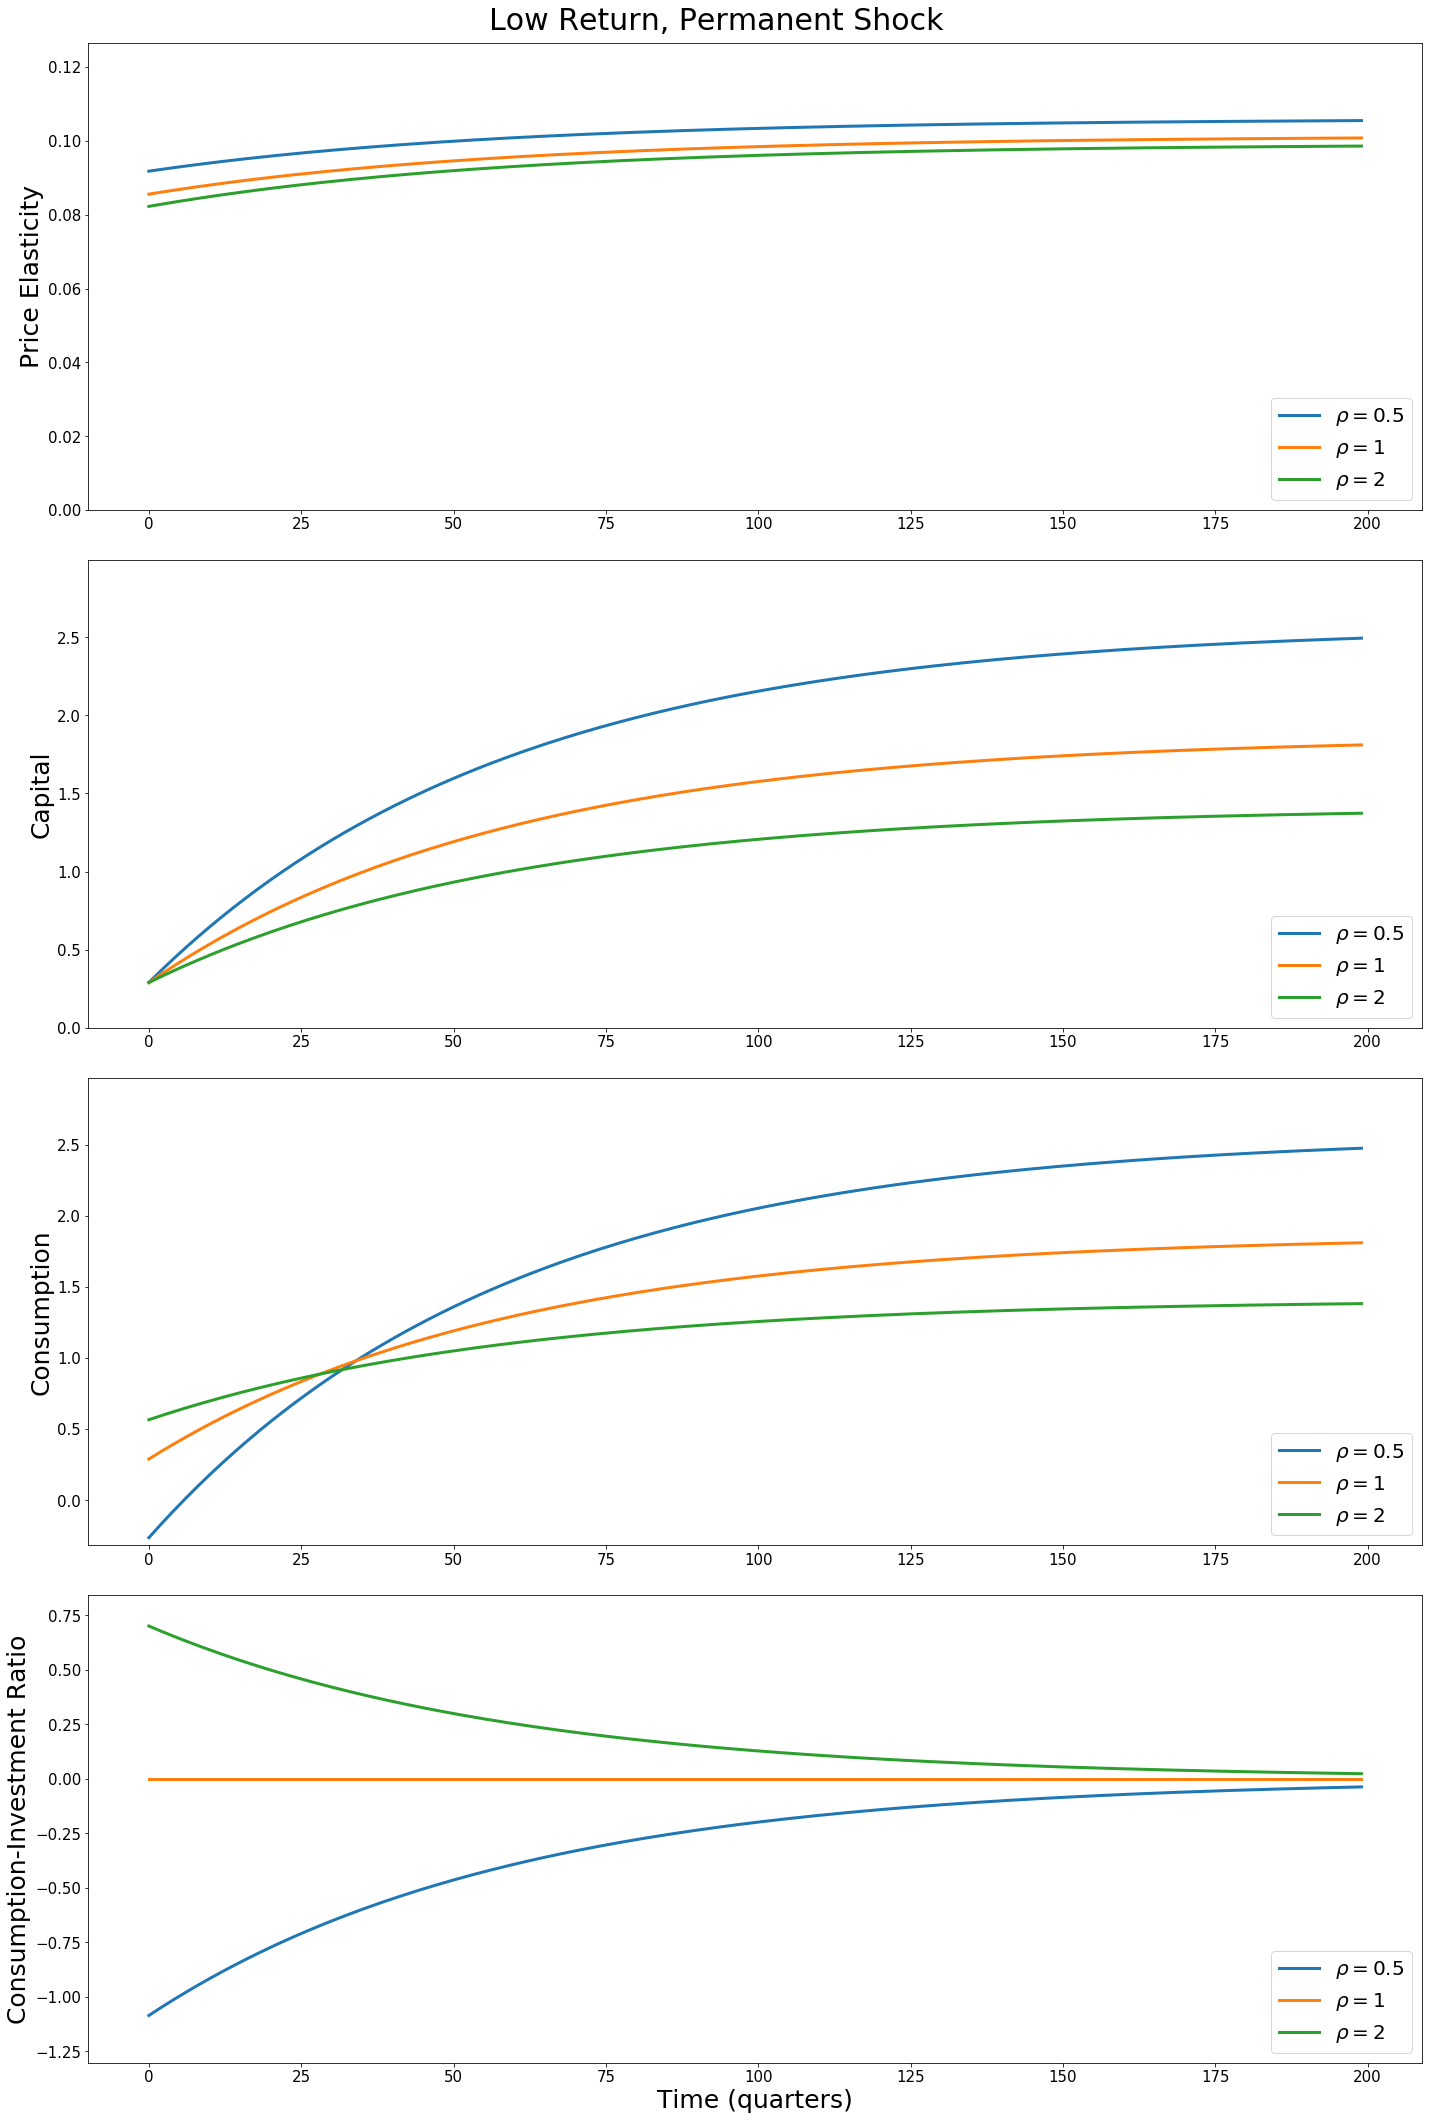

In [10]:
plot_impulse(ρs, γ, βz, T, empirical_method = 0, shock = 1, rf_factor = 1, 
             transform_shocks = True, title = "Low Return, Permanent Shock")

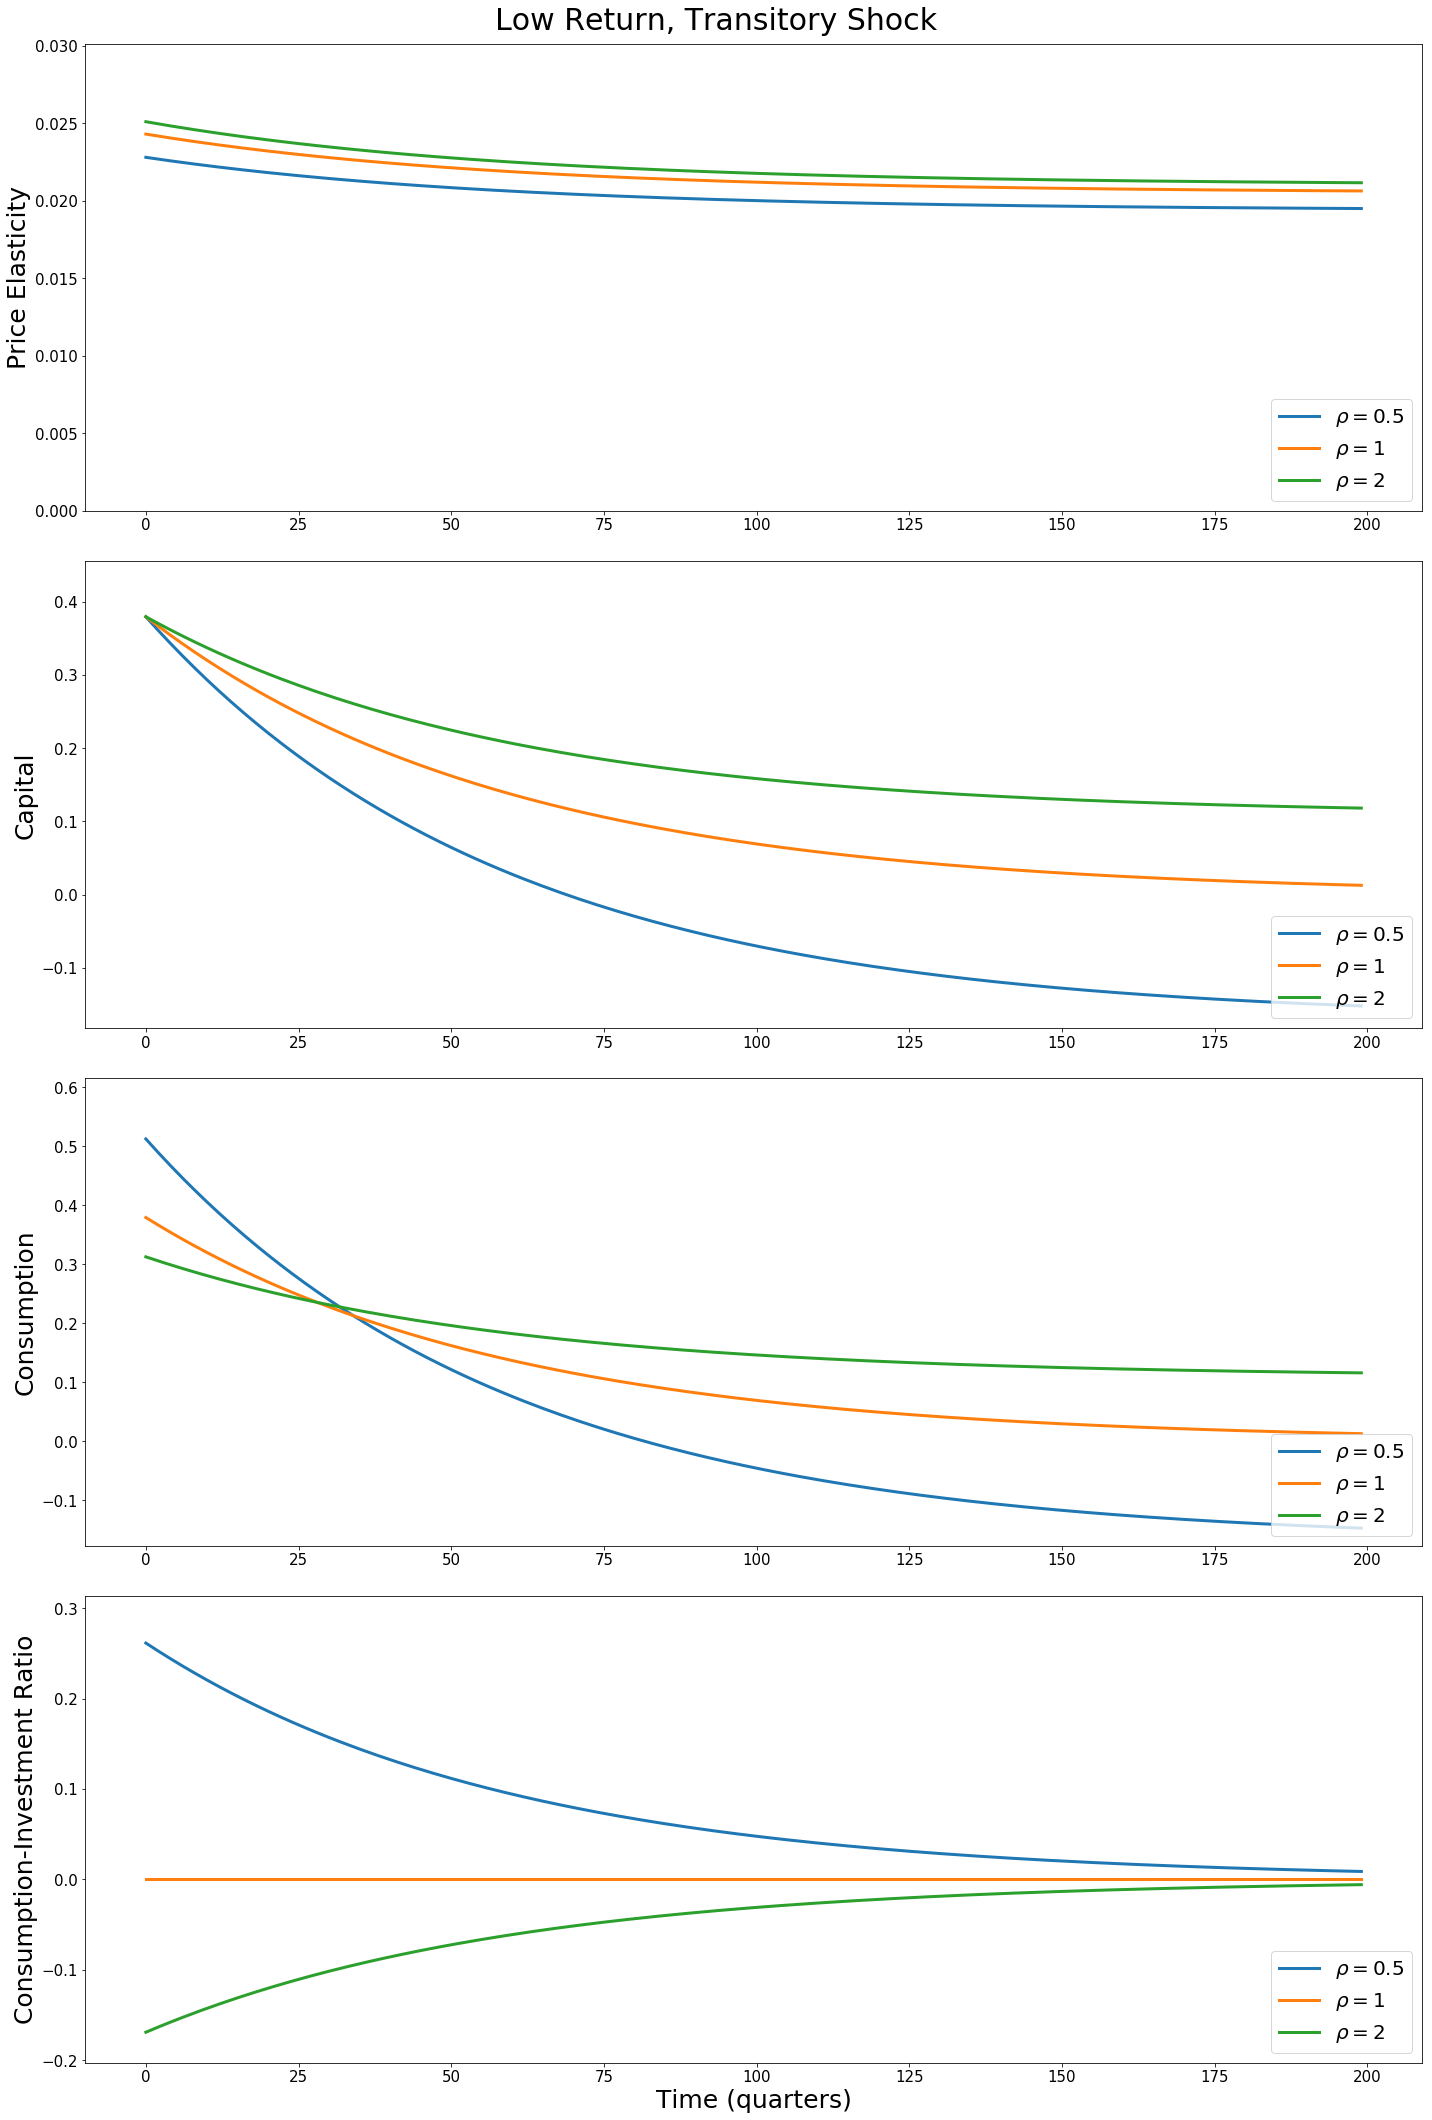

In [11]:
plot_impulse(ρs, γ, βz, T, empirical_method = 0, shock = 2, rf_factor = 1, 
             transform_shocks = True, title = "Low Return, Transitory Shock")

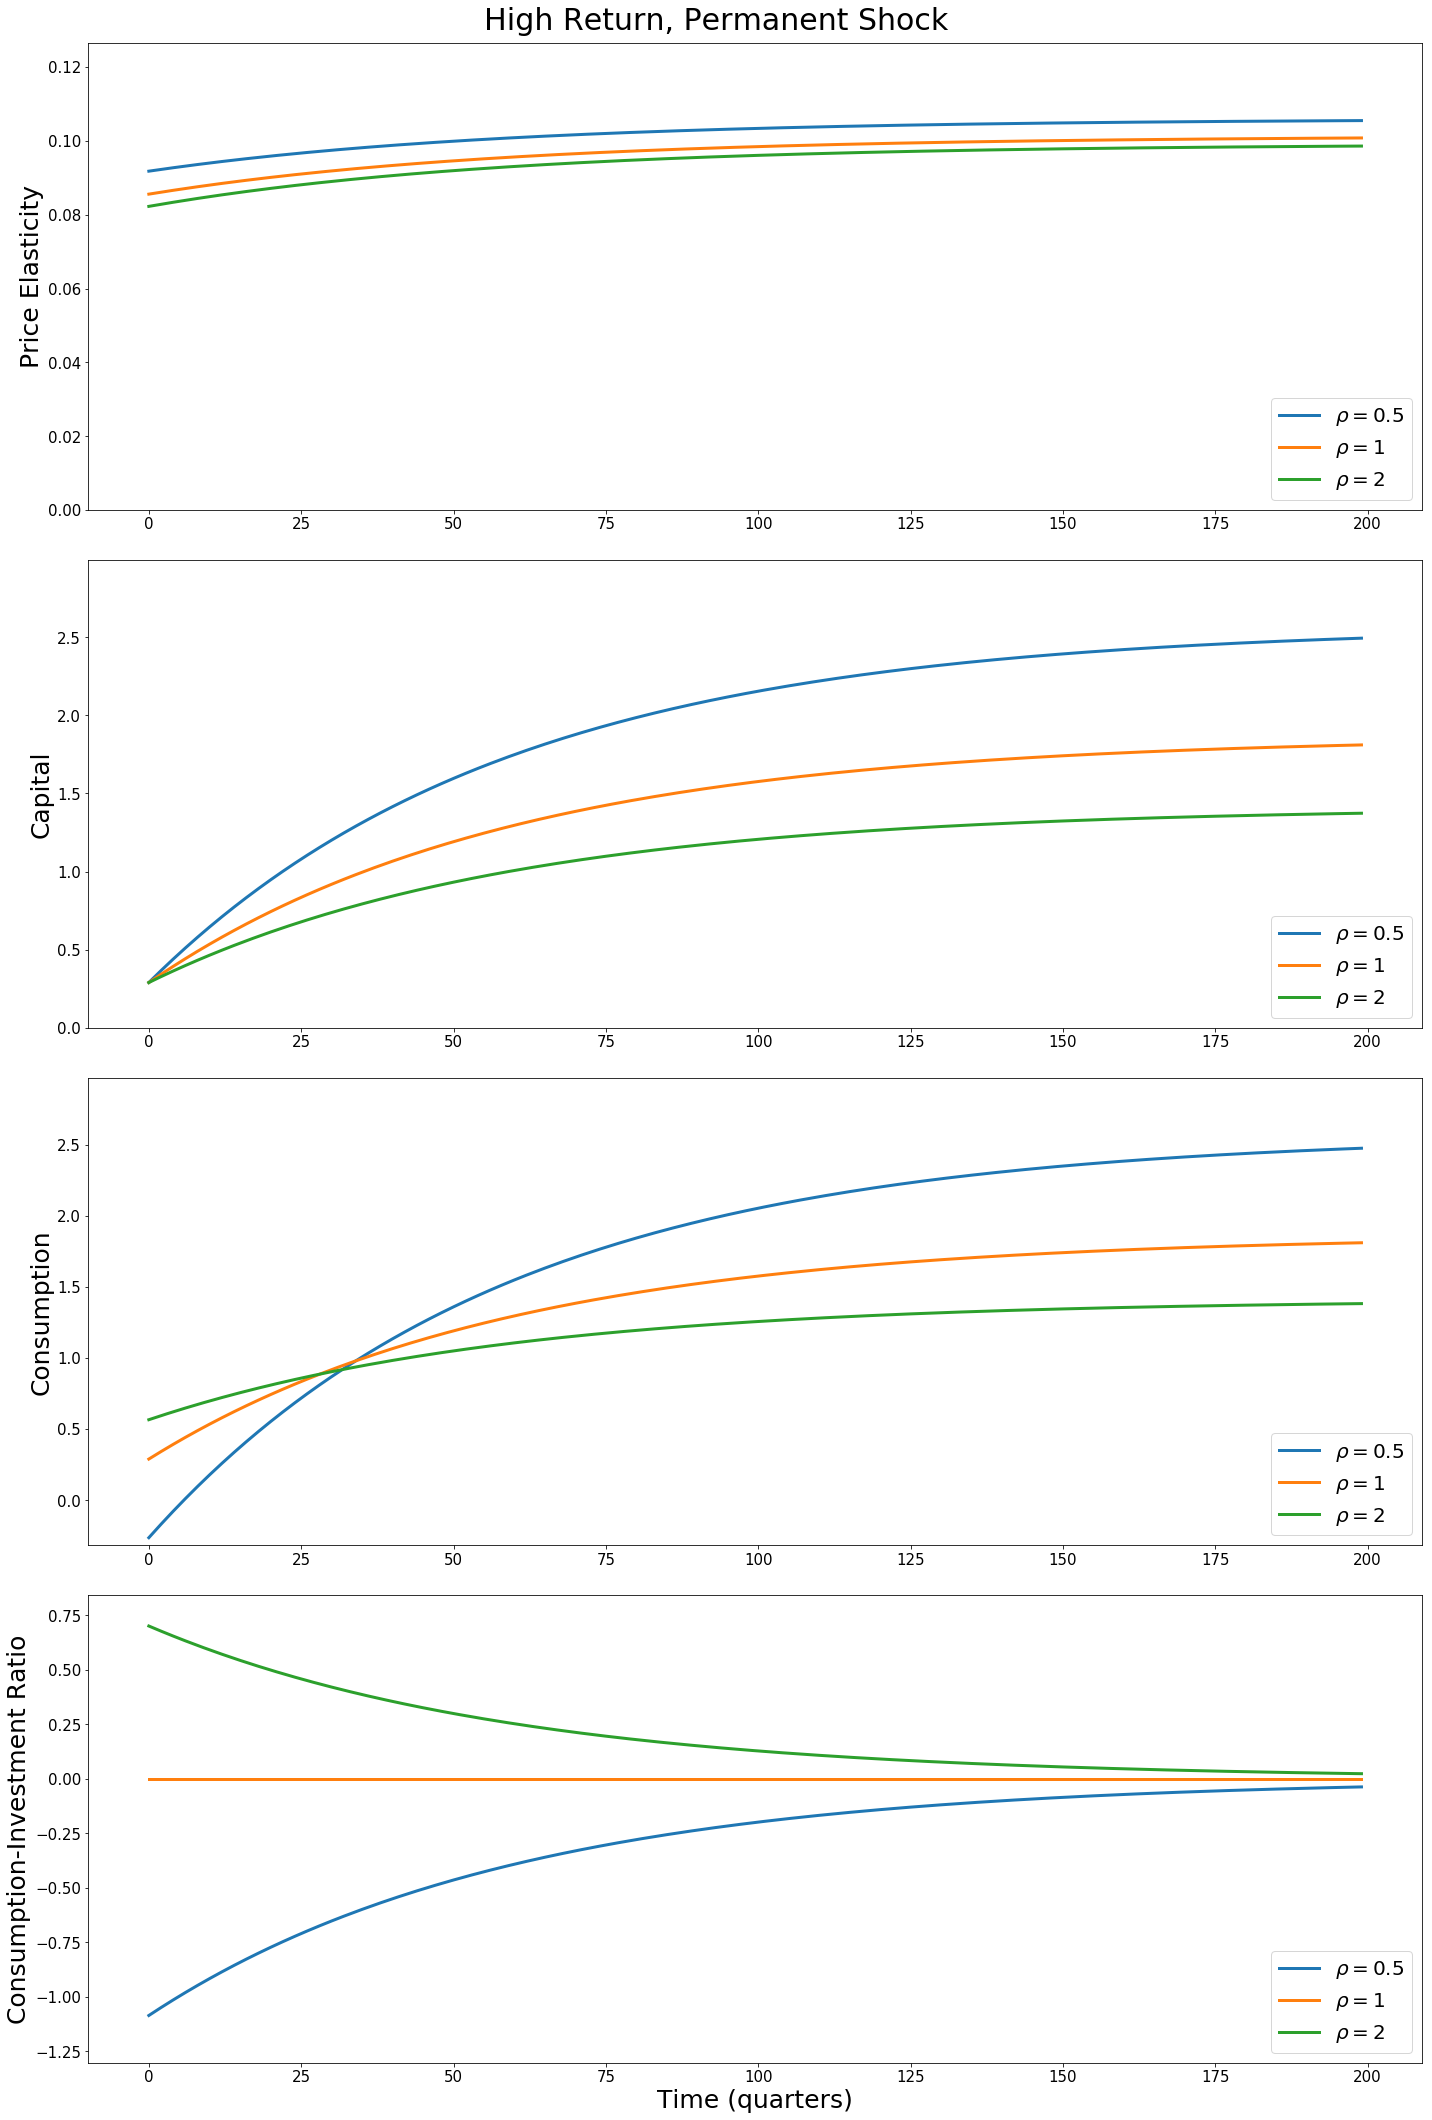

In [12]:
plot_impulse(ρs, γ, βz, T, empirical_method = 0, shock = 1, rf_factor = 2, 
             transform_shocks = True, title = "High Return, Permanent Shock")

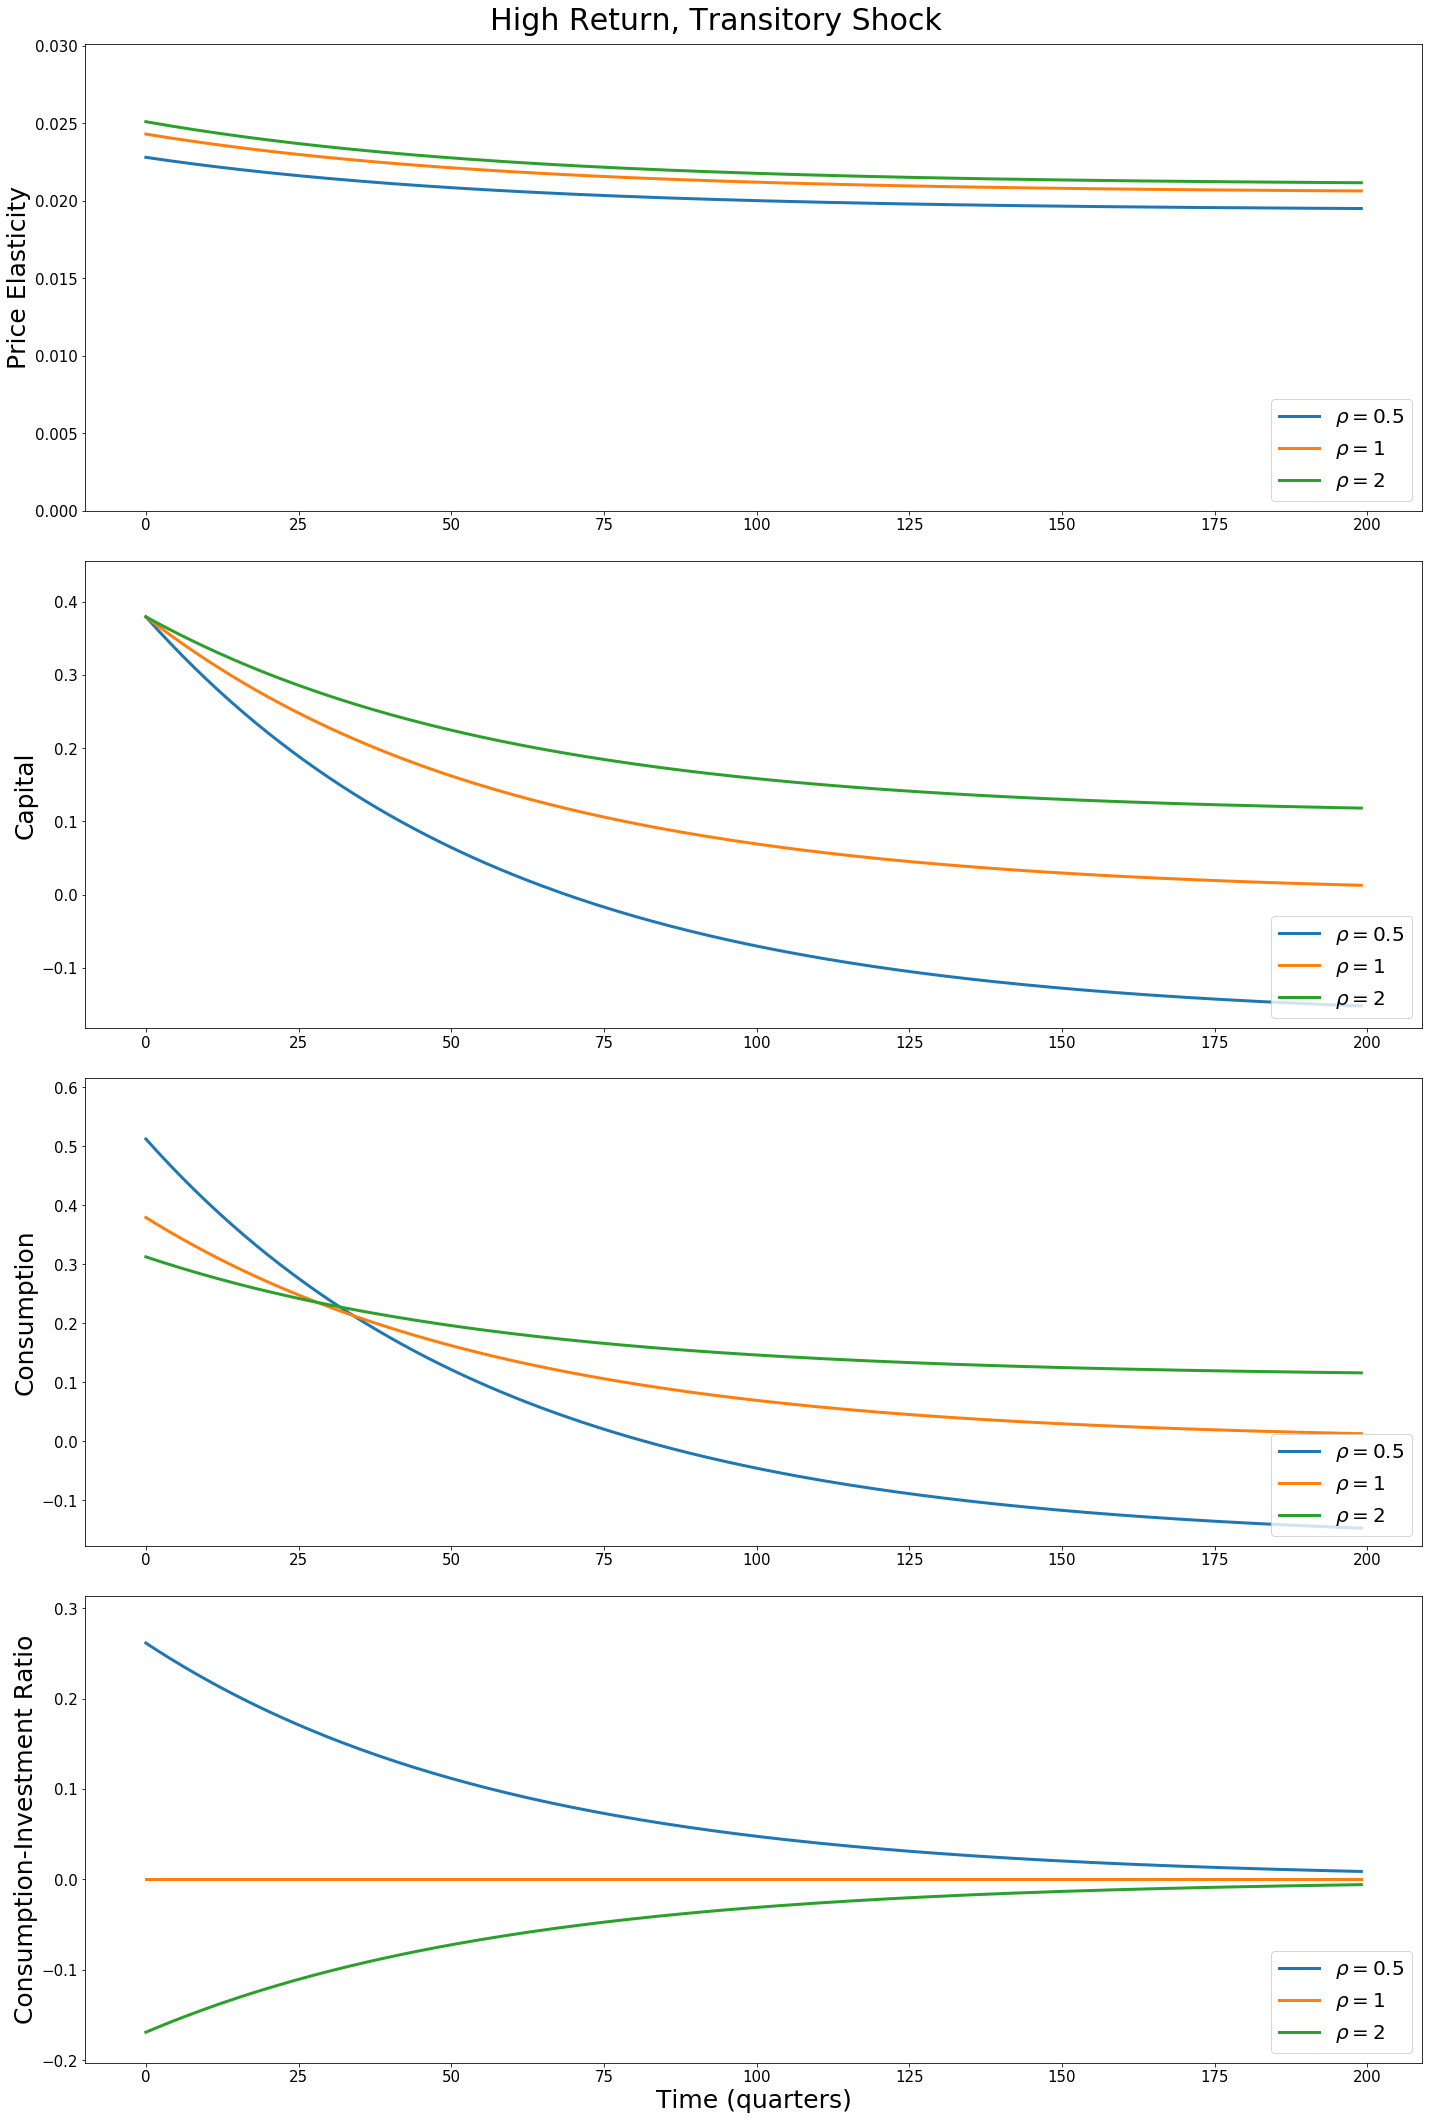

In [13]:
plot_impulse(ρs, γ, βz, T, empirical_method = 0, shock = 2, rf_factor = 2, 
             transform_shocks = True, title = "High Return, Transitory Shock")

In [14]:
# plot_impulse(ρs, γ, βz, T, empirical_method = 2, shock = 1, rf_factor = 2, 
#              transform_shocks = True, title = "Zero Adjustment Cost, Permanent Shock")

In [15]:
# plot_impulse(ρs, γ, βz, T, empirical_method = 2, shock = 2, rf_factor = 2, 
#              transform_shocks = True, title = "Zero Adjustment Cost, Transitory Shock")

## References

Eberly, Janice, and Neng Wang. 2009. "Capital Reallocation and Growth." American Economic Review, 99 (2): 560-66.